### numpy를 image로 변환

In [2]:
# Warning 생략
import warnings
warnings.filterwarnings('ignore')
# Pandas
import pandas as pd
# Numpy
import numpy as np
# ML 저장
import joblib
# 그래프
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

In [3]:
fruits = np.load("../Data/fruits.npy")
fruits.shape

(300, 100, 100)

In [4]:
# Image로 저장하기
from PIL import Image

In [6]:
for i in range(300):
    image = Image.fromarray(fruits[i]).convert('L') # L: 흑백톤
    image.save("../Data/fruits/fruit_%03d.jpg"%i, "JPEG")       #d에 i(%가 넣어주는 역할)가 들어간다고 보면 된다.

---
### Image를 읽어서 Numpy로 변환하기

In [7]:
import glob

In [23]:
numberOfData = 300
imgSize = 100

In [24]:
# 배열 초기화 (1차원 배열 만들어서 3차원으로 만듬 >> 데이터가 0으로 들어감)
fruitsData = \
    np.zeros(numberOfData*imgSize*imgSize, dtype=np.int32).reshape(numberOfData, imgSize, imgSize)

In [25]:
fruitsData

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [27]:
i = 0
for file in sorted(glob.glob('../Data/fruits/*.jpg')):
    img=np.array(Image.open(file), dtype=np.int32)
    fruitsData[i,:,:] = img
    i+=1

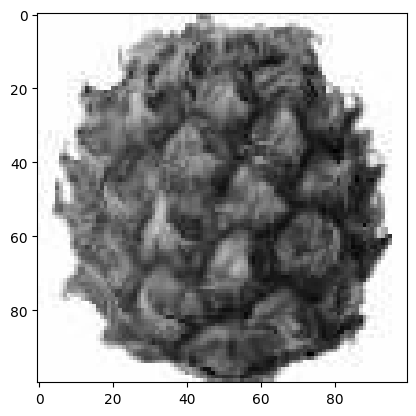

In [30]:
plt.imshow(fruitsData[100].reshape(100,100), cmap='gray_r')
plt.show()

In [19]:
# 저장하기 (npy)
# np.save("../Data/fruitsData", fruitsData)

- 주성분 분석: 컬럼 수가 너무 많지만 지우기는 어렵고 다 사용하거나 저장하기는 용량을 많이 차지할 때 컬럼들을 뭉치는 방법